11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 42s - 50ms/step - accuracy: 0.9411 - loss: 0.1954 - val_accuracy: 0.9828 - val_loss: 0.0638
Epoch 2/5
844/844 - 41s - 48ms/step - accuracy: 0.9816 - loss: 0.0590 - val_accuracy: 0.9832 - val_loss: 0.0576
Epoch 3/5
844/844 - 38s - 45ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9898 - val_loss: 0.0382
Epoch 4/5
844/844 - 37s - 44ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9903 - val_loss: 0.0359
Epoch 5/5
844/844 - 37s - 43ms/step - accuracy: 0.9921 - loss: 0.0239 - val_accuracy: 0.9870 - val_loss: 0.0430

✅ Test Accuracy: 98.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


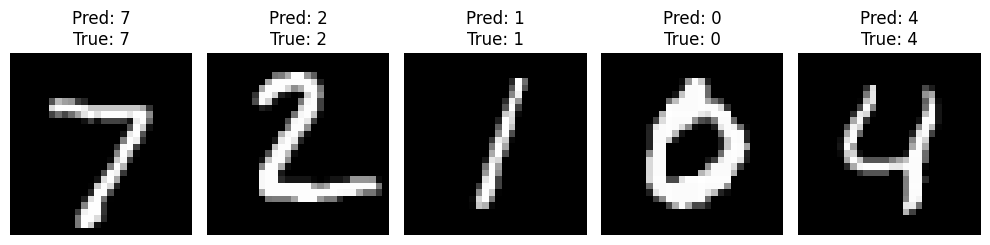

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# 1. Load and Preprocess Dataset
# ------------------------------
# Load MNIST dataset (images of handwritten digits 0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1] and reshape to add channel dimension
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]  # Shape becomes (28, 28, 1)
x_test = x_test[..., tf.newaxis]

# ------------------------------
# 2. Build the CNN Model
# ------------------------------
model = models.Sequential([
    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Downsample with 2x2 max pooling

    # Second convolutional layer: 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Further downsampling

    # Flatten the output to feed into dense layers
    layers.Flatten(),

    # Dense hidden layer with 64 neurons
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (one per digit class), softmax for probabilities
    layers.Dense(10, activation='softmax')
])

# ------------------------------
# 3. Compile the Model
# ------------------------------
# Use Adam optimizer, sparse categorical crossentropy for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ------------------------------
# 4. Train the Model
# ------------------------------
# Train for 5 epochs using 64 images per batch, reserve 10% for validation
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=2)

# ------------------------------
# 5. Evaluate on Test Data
# ------------------------------
# Compute accuracy on the unseen test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# ------------------------------
# 6. Make and Visualize Predictions
# ------------------------------
# Pick first 5 test images and predict their labels
num_samples = 5
sample_images = x_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = model.predict(sample_images)

# Plot each image with predicted and true labels
plt.figure(figsize=(10, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
